### Setting up notebook:

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=77de19c37df37856407c51facde9e6000e5a586f68c5b61901718aeed6fdc916
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import requests
import bs4
import wget
import glob
import zipfile
from zipfile import ZipFile
import pandas as pd
import numpy as np
import missingno as msno
import plotly.graph_objects as go
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [ ]:
# Defining URL to extratct data:
url = "https://www.ffiec.gov/npw/FinancialReport/DataDownload"

In [ ]:
# Creating the function to download the data:
 
def download_ffiec_data(url):
  """
  This function downloads the ZIP files which contains
  the CSV files with the FEDERAL FINANCIAL INSTITUTIONS 
  EXAMINATION COUNCIL data from their webpage, unzip them
  and print a list with the name of the downloaded files.

  Input: ffiec url
  Output: unzipped CSV files
  """
  response = requests.get(url)
 
  # Creating a html document from the website:
  html_doc = bs4.BeautifulSoup(response.text, 'html.parser')
 
  # Extracting the script as a string to create the links 
  # to automatically download the data:
  text = html_doc.find_all('script')[1].string
 
  # Taking only the important information from the string:
  splitted1 = text.split("ZipFileCSV() {\r\n        window.location.href = '")
 
  # Dropping the first element of the list because it doesn't 
  # contain anything relevant:
  splitted1 = splitted1[1:]
 
  # the list where links are going to be stored:
  list_of_links = []
 
  # url pre-fix for the links:
  new_url = url.split('npw')[0]
 
  # Creating the links to download the data:
  for i in range(len(splitted1)):
    link = new_url + splitted1[i].split("';")[0]
    list_of_links.append(link)
 
  # Downloading the data:
  for link in list_of_links:
    wget.download(link)
 
  # List of all zip files:
  zip_files = glob.glob("/content/*.zip")
 
  # Unzipping files:
  for file in zip_files:
    zip = ZipFile(file)
    zip.extractall()
 
  # Creating a list of all unzipped csv files:
  csv_files = glob.glob("/content/*.CSV")
  return csv_files

In [ ]:
download_ffiec_data(url)

['/content/CSV_TRANSFORMATIONS.CSV',
 '/content/CSV_ATTRIBUTES_ACTIVE.CSV',
 '/content/CSV_ATTRIBUTES_CLOSED.CSV',
 '/content/CSV_ATTRIBUTES_BRANCHES.CSV',
 '/content/CSV_RELATIONSHIPS.CSV']

# 2. Read: Read the datasets into proper data structures

In [ ]:
# Opening files:
active_df = pd.read_csv('CSV_ATTRIBUTES_ACTIVE.CSV')
branches_df = pd.read_csv('CSV_ATTRIBUTES_BRANCHES.CSV')
closed_df = pd.read_csv('CSV_ATTRIBUTES_CLOSED.CSV')
relationships_df = pd.read_csv('CSV_RELATIONSHIPS.CSV')
transformations_df = pd.read_csv('CSV_TRANSFORMATIONS.CSV')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (36,46,48,64) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (20,46,64,65,71,72) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (20,36,39,45,46,48,64,65,72) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
# Active: Provides information describing the characteristics of open 
# and active institutions.
active_df

#ID_RSSD           D_DT_START  ...                ID_LEI  IHC_IND
0            37  04/15/2009 00:00:00  ...                     0        0
1            73  12/31/2008 00:00:00  ...                     0        0
2           242  01/01/2012 00:00:00  ...                     0        0
3           279  03/27/2020 00:00:00  ...  54930067OMWEWTHVDO95        0
4           354  12/04/2019 00:00:00  ...  549300T61O0X0RJMQ375        0
...         ...                  ...  ...                   ...      ...
63708   5613496  05/03/2021 00:00:00  ...  549300L0H2UP9WUME281        0
63709   5613508  05/03/2021 00:00:00  ...  549300RAA38RM9RNJH75        0
63710   5613517  05/01/2021 00:00:00  ...  5493002HQNXKD40JYN03        0
63711   5613526  04/28/2021 00:00:00  ...                     0        0
63712   5613535  04/28/2021 00:00:00  ...                     0        0

[63713 rows x 75 columns]

In [ ]:
# Branches: Provides the last instance of branches whose head office is listed 
# in either the Active or Closed Attributes tables.
branches_df

#ID_RSSD           D_DT_START  ... ID_LEI  IHC_IND
0        1718982  12/07/1966 00:00:00  ...      0        0
1         766351  01/01/1965 00:00:00  ...      0        0
2         141109  06/30/1972 00:00:00  ...      0        0
3        2195469  06/30/1972 00:00:00  ...      0        0
4         474834  06/30/1972 00:00:00  ...      0        0
...          ...                  ...  ...    ...      ...
168003   5652534  09/01/2021 00:00:00  ...      0        0
168004   5652981  08/02/2021 00:00:00  ...      0        0
168005   5652990  08/16/2021 00:00:00  ...      0        0
168006   5653782  08/16/2021 00:00:00  ...      0        0
168007   5654088  09/13/2021 00:00:00  ...      0        0

[168008 rows x 75 columns]

In [ ]:
# Closed: Provides the last instance of closed / failed institutions.
closed_df

#ID_RSSD           D_DT_START  ... ID_LEI  IHC_IND
0          42756  01/01/1977 00:00:00  ...      0        0
1             64  06/08/1987 00:00:00  ...      0        0
2            185  12/31/1979 00:00:00  ...      0        0
3            381  12/31/1979 00:00:00  ...      0        0
4          56995  12/31/1979 00:00:00  ...      0        0
...          ...                  ...  ...    ...      ...
148100   5618727  09/01/2020 00:00:00  ...      0        0
148101   5630877  07/01/2021 00:00:00  ...      0        0
148102   5631025  07/01/2021 00:00:00  ...      0        0
148103   5631052  07/01/2021 00:00:00  ...      0        0
148104   5633083  07/01/2021 00:00:00  ...      0        0

[148105 rows x 75 columns]

In [ ]:
# Relationships: Provides the history of ownership between two entities.
relationships_df

#ID_RSSD_PARENT  ID_RSSD_OFFSPRING  ... DT_RELN_EST  DT_START
0                   130            1081305  ...    19840627  19840627
1                   279            3923155  ...    20080123  20080123
2                   505            2913168  ...    19990527  19990527
3                   505            2913168  ...    19990527  20070630
4                   505            3079566  ...    20000601  20000601
...                 ...                ...  ...         ...       ...
267875          5653830            5653876  ...    20201012  20201012
267876          5653830            5653885  ...    20201012  20201012
267877          5653988            5653997  ...    20210809  20210809
267878          5653997            5654006  ...    20210809  20210809
267879          5654042            5654024  ...    20200529  20200529

[267880 rows x 22 columns]

In [ ]:
# Transformations: Provides information on mergers and failures.
transformations_df

#ID_RSSD_PREDECESSOR  ID_RSSD_SUCCESSOR  ... ACCT_METHOD  DT_TRANS
0                        28              75026  ...           0  19940101
1                        46            1003848  ...           0  19931001
2                        55             951951  ...           0  19820111
3                        64            1213683  ...           0  19880730
4                        82              41393  ...           0  20000101
...                     ...                ...  ...         ...       ...
56571               5633074            5631052  ...           0  20210728
56572               5633083            3114935  ...           0  20210729
56573               5633092            3114935  ...           0  20210729
56574               5653401            5653399  ...           0  20210730
56575               5653438            5653399  ...           0  20210730

[56576 rows x 6 columns]

### Testing completitude:

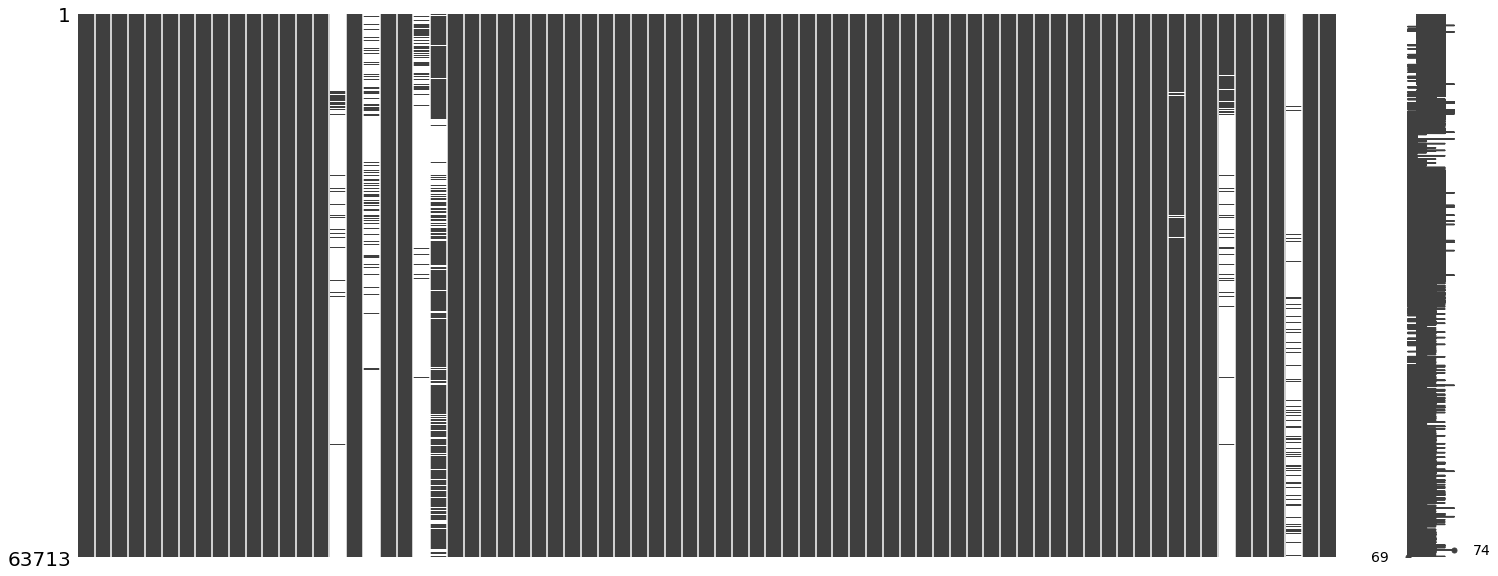

In [ ]:
msno.matrix(active_df)

In [ ]:
pd.DataFrame(active_df.isna().sum(), columns=['Count']).sort_values(by='Count', ascending=False).head(10)

Count
BANK_CNT         59812
CNTRY_INC_NM     57430
D_DT_INSUR       57336
D_DT_EXIST_CMNC  55459
PRIM_FED_REG     49373
D_DT_OPEN        15296
URL                421
#ID_RSSD             0
ID_ABA_PRIM          0
DIST_FRS             0

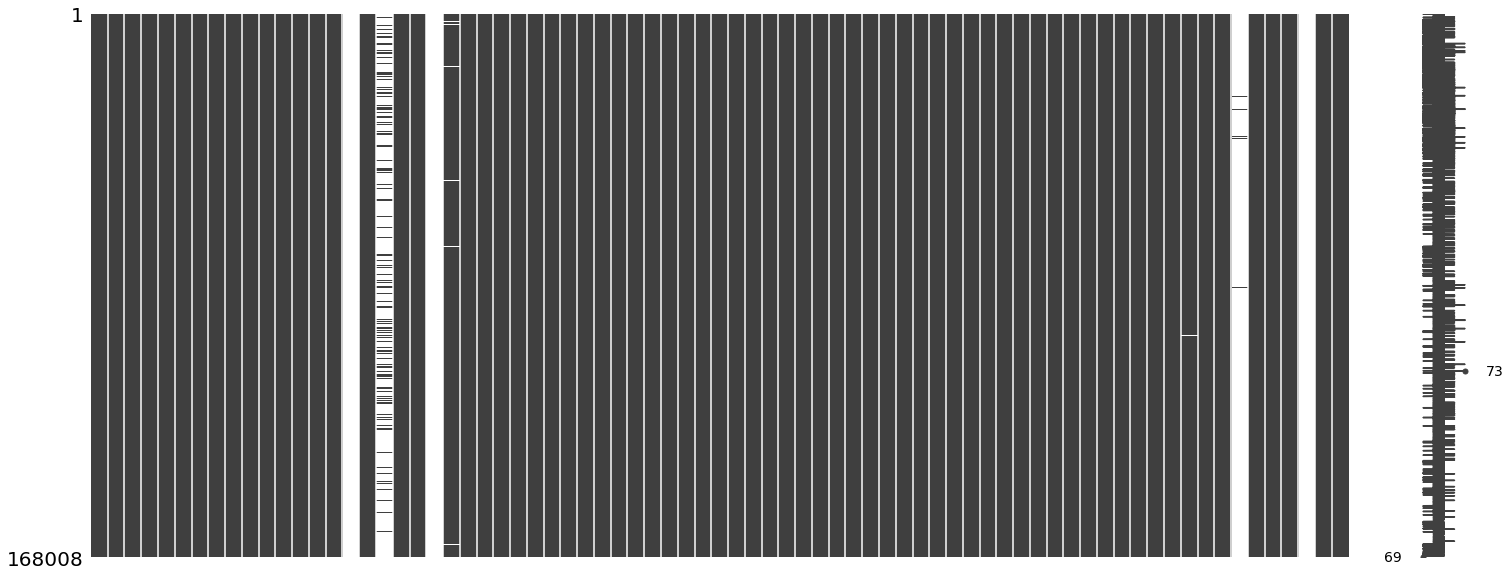

In [ ]:
msno.matrix(branches_df)

In [ ]:
pd.DataFrame(branches_df.isna().sum(), columns=['Count']).sort_values(by='Count', ascending=False).head(10)

Count
BANK_CNT         168008
CNTRY_INC_NM     168000
D_DT_INSUR       167980
PRIM_FED_REG     166602
D_DT_EXIST_CMNC  133580
D_DT_OPEN           979
URL                   8
#ID_RSSD              0
ID_ABA_PRIM           0
DIST_FRS              0

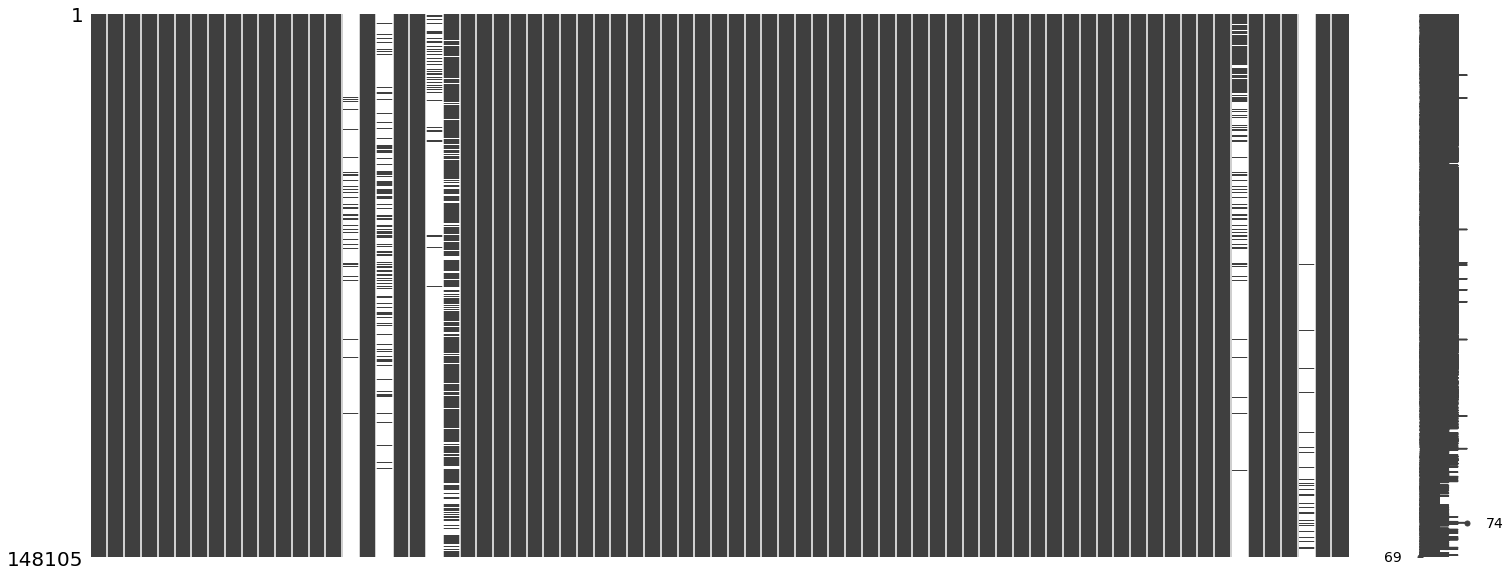

In [ ]:
msno.matrix(closed_df)

In [ ]:
pd.DataFrame(closed_df.isna().sum(), columns=['Count']).sort_values(by='Count', ascending=False).head(10)

Count
CNTRY_INC_NM     139120
BANK_CNT         137326
D_DT_INSUR       137076
D_DT_EXIST_CMNC  115759
PRIM_FED_REG     113590
D_DT_OPEN         29207
URL                 311
STREET_LINE1          1
#ID_RSSD              0
ID_FDIC_CERT          0

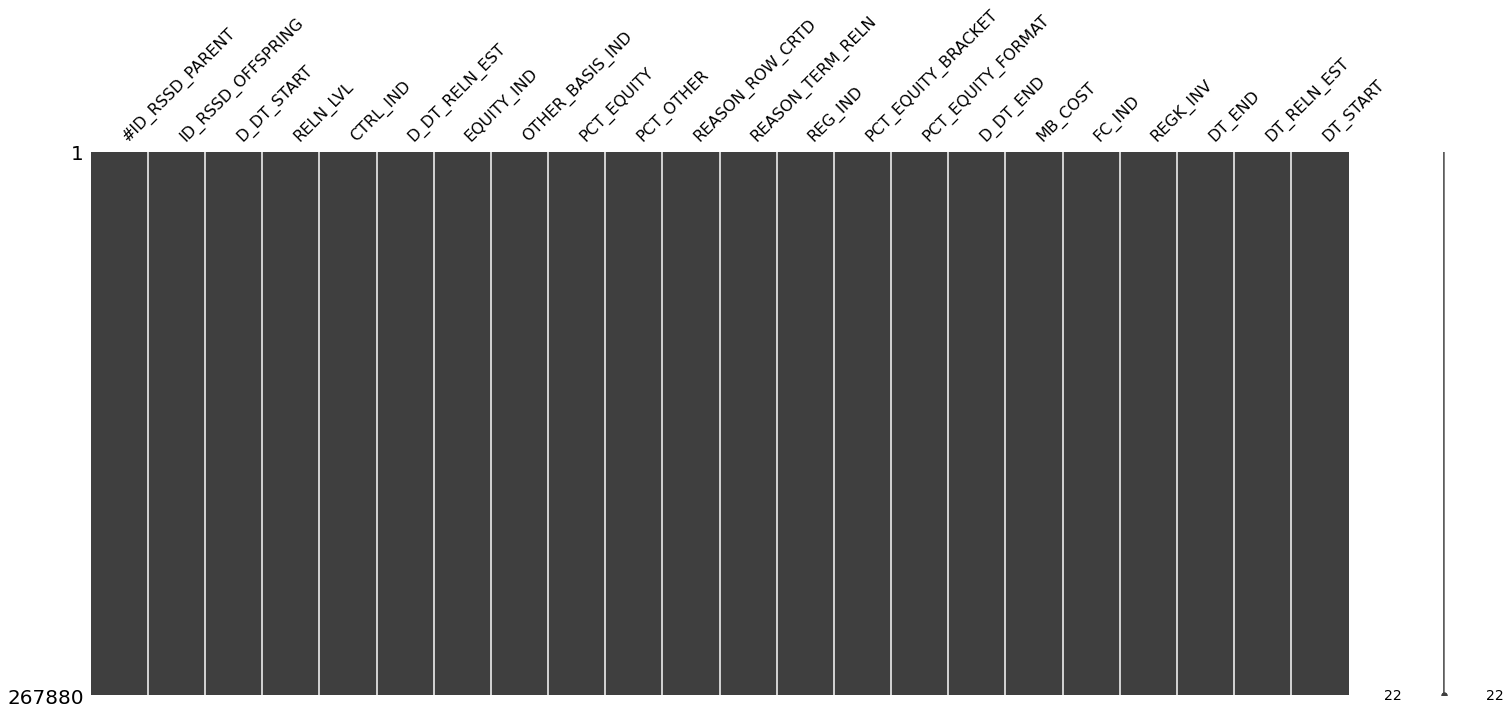

In [ ]:
msno.matrix(relationships_df)

In [ ]:
pd.DataFrame(relationships_df.isna().sum(), columns=['Count']).sort_values(by='Count', ascending=False).head(10)

Count
#ID_RSSD_PARENT         0
ID_RSSD_OFFSPRING       0
DT_RELN_EST             0
DT_END                  0
REGK_INV                0
FC_IND                  0
MB_COST                 0
D_DT_END                0
PCT_EQUITY_FORMAT       0
PCT_EQUITY_BRACKET      0

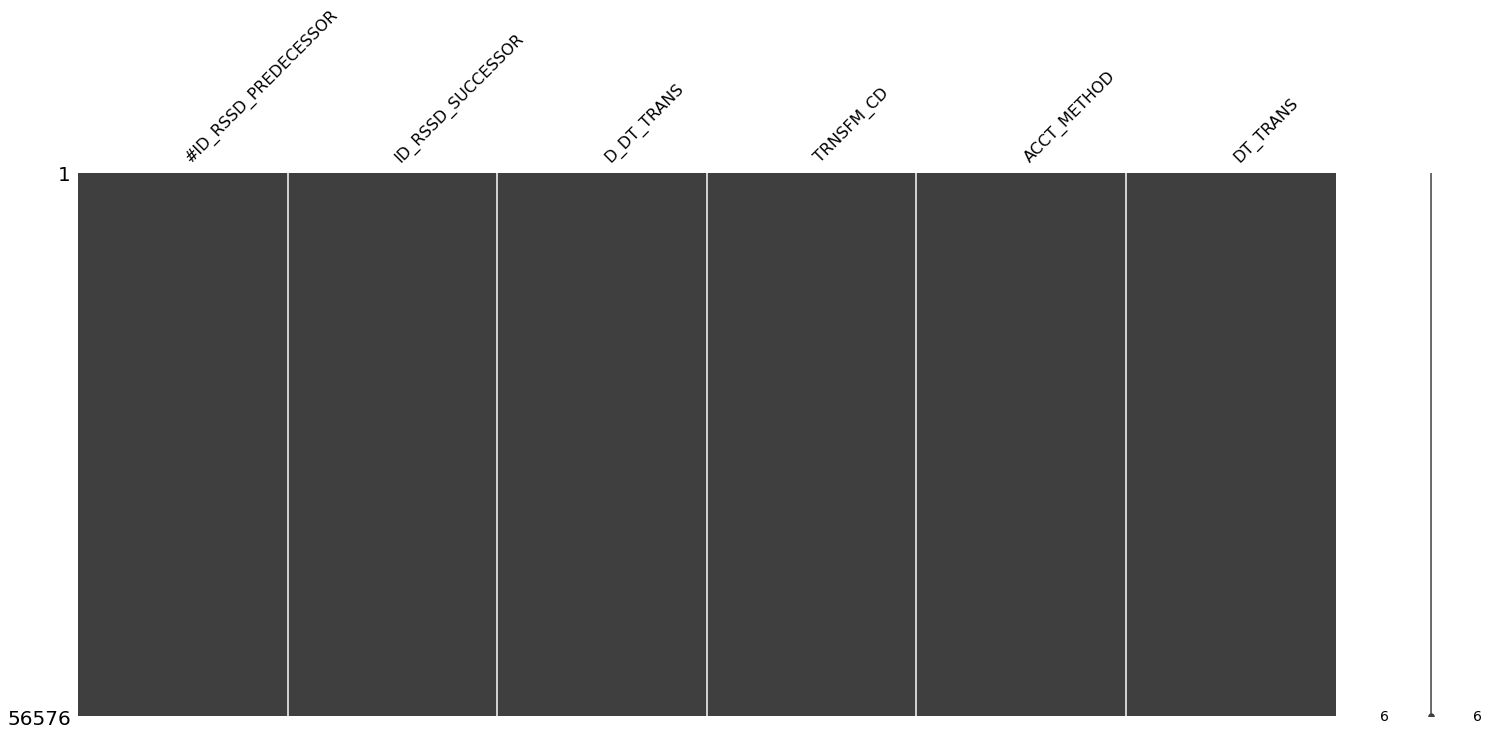

In [ ]:
msno.matrix(transformations_df)

In [ ]:
pd.DataFrame(transformations_df.isna().sum(), columns=['Count']).sort_values(by='Count', ascending=False).head(10)

Count
#ID_RSSD_PREDECESSOR      0
ID_RSSD_SUCCESSOR         0
D_DT_TRANS                0
TRNSFM_CD                 0
ACCT_METHOD               0
DT_TRANS                  0

### Dict Entity Type: 

Required to improve dataframe reading when searching for institutions or Hierarchy 

In [ ]:
# Dictionary of Entity Types taken from the information in
# https://www.ffiec.gov/npw/StaticData/DataDownload/NPW%20Data%20Dictionary.pdf 
# page 15:

entity_type_dict = {
'AGB': 'Agreement Corporation - Banking',
'AGI': 'Agreement Corporation - Investment',
'BHC': 'Bank Holding Company',
'CPB': 'Cooperative Bank',
'DBR': 'Domestic Branch of a Domestic Bank',
'DEO': 'Domestic Entity Other',
'DPS': 'Data Processing Servicer',
'EBR': 'Edge Corporation - Domestic Branch',
'EDB': 'Edge Corporation - Banking',
'EDI': 'Edge Corporation - Investment',
'FBH': 'Foreign Banking Organization as a BHC',
'FBK': 'Foreign Bank',
'FBO': 'Foreign Banking Organization',
'FCU': 'Federal Credit Union',
'FEO': 'Foreign Entity Other',
'FHD': 'Financial Holding Company / BHC (Note: Can be a domestic or foreign domiciled holding company)',
'FHF': 'Financial Holding Company / FBO',
'FNC': 'Finance Company',
'FSB': 'Federal Savings Bank',
'IBK': 'International Bank of a U.S. Depository - Edge or Trust Co.',
'IBR': 'Foreign Branch of a U.S. Bank',
'IHC': 'Intermediate Holding Company',
'IFB': 'Insured Federal Branch of an FBO',
'INB': 'International Non-bank Subs of Domestic Entities',
'ISB': 'Insured State Branch of an FBO',
'MTC': 'Non-deposit Trust Company - Member',
'NAT': 'National Bank',
'NMB': 'Non-member Bank',
'NTC': 'Non-deposit Trust Company - Non-member',
'NYI': 'New York Investment Company',
'PST': 'Non-U.S. Branch managed by a U.S. Branch/Agency of a Foreign Bank for 002’s reporting - Pseudo Twig',
'REP': 'Representative Office',
'SAL': 'Savings & Loan Association',
'SBD': 'Securities Broker / Dealer',
'SCU': 'State Credit Union',
'SLHC': 'Savings and Loan Holding Company',
'SMB': 'State Member Bank',
'SSB': 'State Savings Bank',
'TWG': 'Non-U.S. Branch managed by a U.S. Branch/Agency of a Foreign Bank - TWIG',
'UFA': 'Uninsured Federal Agency of an FBO',
'UFB': 'Uninsured Federal Branch of an FBO',
'USA': 'Uninsured State Agency of an FBO',
'USB': 'Uninsured State Branch of an FBO',
}

# 3. Relationships: Create the relationships between the bank holding companies, subsidiaries and branches

In [ ]:
# Creating a dictionary containing offspring and parent relationships:
relationships_dict = dict(zip(relationships_df['ID_RSSD_OFFSPRING'], relationships_df['#ID_RSSD_PARENT']))

# Adding the parent to the institution according to the offspring-parent relationship:
# active_df
active_df['PARENT'] = active_df['#ID_RSSD'].map(relationships_dict)
active_df['PARENT'] = active_df['PARENT'].fillna(0).astype(int)
# branches_df
branches_df['PARENT'] = branches_df['#ID_RSSD'].map(relationships_dict)
branches_df['PARENT'] = branches_df['PARENT'].fillna(0).astype(int)
# closed_df
closed_df['PARENT'] = closed_df['#ID_RSSD'].map(relationships_dict)
closed_df['PARENT'] = closed_df['PARENT'].fillna(0).astype(int)

# Creating a new column indicating the origin of data before merging the dataframes:
active_df['ORIGIN'] = 'active'
branches_df['ORIGIN'] = 'branch'
closed_df['ORIGIN'] = 'closed'

# Merging DataFrames:
active_institutions_df = active_df.append(branches_df) # this dataframe contains only the information from the 
                                                       # active and branches datasets, including parent RSSD_ID.

df_full = active_institutions_df.append(closed_df)     # this dataframe contains all the information from 
                                                       # the three main datasets, including parent RSSD_ID.

# Adding the Institution Type Information to the dataframe:
df_full['Institution Type'] = df_full['ENTITY_TYPE'].map(entity_type_dict)

# Creating a dictionary with the Legal Name and the ID RSSD:
legal_names_dict = dict(zip(df_full['#ID_RSSD'], df_full['NM_LGL']))

In [ ]:
relationships_dict

{1081305: 130,
 3923155: 279,
 2913168: 505,
 3079566: 505,
 2371825: 1362303,
 2480174: 608,
 2607298: 1114931,
 2607300: 462372,
 2573768: 804963,
 2374013: 242248,
 1095432: 808176,
 1095441: 2291914,
 1095450: 1095423,
 1213535: 1146,
 1422038: 1146,
 1906181: 1146,
 3103920: 369378,
 1087651: 1258,
 1424863: 212652,
 3357723: 1829,
 4536020: 1829,
 1383812: 2040,
 2365954: 962890,
 4334271: 229801,
 4334338: 2376,
 4334431: 2376,
 5061051: 2376,
 783013: 1113279,
 1113288: 1113279,
 1113297: 1113279,
 1113309: 1138487,
 1113354: 1113372,
 1113363: 1113390,
 1113402: 2509,
 1113439: 2509,
 1113457: 2509,
 1113466: 2509,
 1113475: 2509,
 1113484: 2509,
 1113493: 2509,
 1113505: 2509,
 1485761: 2509,
 1489983: 2509,
 1490028: 2509,
 1986035: 2648,
 2266499: 2648,
 4322858: 85472,
 4728759: 85472,
 2217905: 3506,
 2218023: 3506,
 2218144: 2218023,
 2619581: 1138535,
 2845241: 1455063,
 2878762: 3506,
 1078284: 1020283,
 1078305: 1020283,
 1223413: 480228,
 3233779: 3579,
 443764: 3850

### Search Institutions 

(as shwon in https://www.ffiec.gov/npw/)

In [ ]:
def search_institution(RSSD_ID):
  
  """
  This function emulates the "Search Institutions" engine found 
  in https://www.ffiec.gov/npw/

  input: institution's RSSD_ID (as an integer)
  output: Dataframe containing Name, City, State, Institution Type
  Original dataframe (where RSSD_ID is located), and Parent RSSD_ID
  """
  
  # Setting up the dataframe to display full text:
  pd.set_option('display.max_colwidth', None)
  
  # Creating a temporary dataframe with the information of the indicated RSSD_ID:
  temp_df = df_full[df_full['#ID_RSSD']==RSSD_ID].reset_index(drop = True)
  
  # Selecting the columns to be visualized imitating the mentioned engine, 
  # and adding the parent RSSD_ID:
  df = temp_df[['NM_LGL','#ID_RSSD', 'CITY','STATE_ABBR_NM','Institution Type','ORIGIN','PARENT']]
  
  # Renaming the columns:
  df.columns = ['Name','RSSD ID','City','State/ Country','Institution Type','Status','Parent']

  return df

In [ ]:
search_institution(35301)

Name  ...   Parent
0  STATE STREET BANK AND TRUST COMPANY                                                                                       ...  1111435

[1 rows x 7 columns]

In [ ]:
search_institution(12311)

Name  ...   Parent
0  HUNTINGTON NATIONAL BANK, THE                                                                                             ...  1068191

[1 rows x 7 columns]

# 4. Legal Entity Hierarchy: 

### Dataframe visualization:

In [ ]:
def organization_hierarchy_up (RSSD_ID):
  """
  This function provides a dataframe with all the organizations
  above the RSSD_ID indicated, in order of hierarchy.

  input: institution's RSSD_ID (as an integer)
  output: Dataframe containing RSSD, Parent's RSSD, Name, Institution Type, City, State,
  Original dataframe (where RSSD_ID is located).
  """
  
  # The first element of the dataframe comes with the information
  # from the search_institution function:
  temp_df = search_institution(RSSD_ID)
  
  # Parent's RSSD ID is extracted from previous result to bring 
  # the same information from the parent:
  parent = search_institution(RSSD_ID)['Parent'][0]

  # starts a while loop to bring information from all the parents found in the 
  # hierarchy:
  while parent != 0:
    # parent's information is added to the dataframe to be shown:
    temp_df = temp_df.append(search_institution(parent))
    
    # parent value is updated:
    parent = search_institution(parent)['Parent'][0]
  
  # Columns are arranged to fit the structure of the Organization Hierarchy
  # presented in https://www.ffiec.gov/npw , as well as information is organazed
  # from parent to offspring:
  final_df = temp_df[['RSSD ID','Parent','Name','Institution Type','City','State/ Country','Status']][::-1].reset_index(drop = True)
  
  return final_df

In [ ]:
organization_hierarchy_up (2051592)

RSSD ID   Parent  ... State/ Country  Status
0  1068191        0  ...             OH  active
1    12311  1068191  ...             OH  active
2  2837415    12311  ...             OH  active
3  2051592  2837415  ...             NV  active

[4 rows x 7 columns]

In [ ]:
def offspring_function(RSSD_ID):
  """
  offspring function is a recursive function that creates a list
  with the RSSD_ID's offspring.

  input: institution's RSSD_ID (as an integer)
  output: list containing RSSD_ID's offspring 
  """

  # Defining the list containing the direct offspring of the RSSD_ID selected:
  offspring = list(df_full[df_full['PARENT'] == RSSD_ID]['#ID_RSSD'].values)

  # Looping and adding the offspring's offspring to the list:
  for item in offspring:
    offspring = offspring + offspring_function(item)

  # Droping duplicates if any:
  return list(set(offspring))

In [ ]:
search_institution(12311)

Name  ...   Parent
0  HUNTINGTON NATIONAL BANK, THE                                                                                             ...  1068191

[1 rows x 7 columns]

In [ ]:
search_institution(3640322)

Name  ...   Parent
0  HPAL, LLC                                                                                                                 ...  3640313

[1 rows x 7 columns]

In [ ]:
offspring_function(12311)

[4399618,
 3284995,
 3640322,
 3155974,
 2051592,
 3046410,
 3285004,
 3155983,
 3155992,
 2912796,
 3370526,
 3285022,
 3156001,
 1370148,
 3046438,
 2912817,
 3696691,
 2135607,
 3696703,
 2000451,
 3141708,
 1469006,
 3141717,
 3919457,
 4786786,
 255079,
 1259113,
 4348027,
 2020990,
 1259140,
 3144325,
 2021009,
 4446866,
 2021018,
 3924125,
 3924134,
 2984618,
 2984627,
 2482356,
 2984636,
 2984645,
 3296457,
 4847306,
 2591436,
 5018831,
 4458195,
 2901204,
 2528469,
 2984663,
 5018840,
 5078237,
 5124321,
 1068258,
 5546213,
 2857703,
 5018859,
 4399609,
 1818903,
 3285273,
 3285282,
 2875686,
 5307179,
 3362633,
 3925841,
 2500447,
 4899695,
 3790704,
 3790713,
 3790722,
 3444614,
 5272464,
 2596253,
 4393885,
 3444641,
 1875362,
 2837415,
 3209653,
 4877750,
 2596280,
 3209662,
 4221894,
 1875399,
 3873223,
 1875401,
 3705799,
 3284940,
 3489231,
 3289552,
 2411477,
 3284959,
 1875429,
 4399597,
 1875438,
 3284977,
 4997108,
 2000376,
 3640313,
 3046399]

In [ ]:
def organization_hierarchy_down (RSSD_ID):
  """
  This function creates a dataframe containing the information of the 
  selected institution (input), and it's offspring (as shown in 
  ffiec's Organization Hierarchy).

  input: institution's RSSD_ID (as an integer)
  output: DataFrame with it's offspring information
  """

  # Determining selected institution's offspring using the recursive function:
  offspring = offspring_function(RSSD_ID)

  # Adding the firs row in the dataframe (selected institution information):
  temp_df = search_institution(RSSD_ID)

  # Adding the information of the offspring:
  for institution in offspring:
    temp_df = pd.concat([temp_df, search_institution(institution)])
  
  # Arranging columns:
  final_df = temp_df[['RSSD ID','Parent','Name',
                      'Institution Type','City','State/ Country',
                      'Status']].sort_values(by='RSSD ID')

  return final_df.reset_index(drop=True)

In [ ]:
organization_hierarchy_down(12311)

RSSD ID   Parent  ... State/ Country  Status
0     12311  1068191  ...             OH  active
1    255079  2051592  ...             FL  branch
2   1068258    12311  ...             OH  active
3   1259113    12311  ...             OH  closed
4   1259140    12311  ...             OH  closed
..      ...      ...  ...            ...     ...
94  5078237  3790704  ...             DE  closed
95  5124321  5018859  ...             OH  active
96  5272464    12311  ...             OH  active
97  5307179    12311  ...             DE  active
98  5546213  3924134  ...             OH  active

[99 rows x 7 columns]

In [ ]:
def organization_hierarchy_full(RSSD_ID):
  """
  This function append the resulting dataframes from 
  organization_hierarchy_up (RSSD_ID) and
  organization_hierarchy_down

  input: institution's RSSD_ID (as an integer)
  output: dataframe with the whole hierarchy for the
  selected institution
  """
  
  # In order to avoid duplicating or omitting information when appending
  # the dataframes the following specification is required:

  # When the institution has a parent:
  if len(organization_hierarchy_up(RSSD_ID)) > 1:
   # Appending the resulting dataframes from the previous
   # mentioned functions:    
    temp_df = pd.concat([organization_hierarchy_up(RSSD_ID)[:-1], 
                       organization_hierarchy_down(RSSD_ID)])
  
    # Arranging row numbers:
    temp_df = temp_df.reset_index(drop=True)
  
  # When the institution doesn't have a parent:
  else:
    # Appending the resulting dataframes from the previous
    # mentioned functions:
    temp_df = pd.concat([organization_hierarchy_up(RSSD_ID), 
                       organization_hierarchy_down(RSSD_ID)])
  
    # Arranging row numbers:
    temp_df = temp_df.reset_index(drop=True) 
 
  return temp_df.drop_duplicates()

In [ ]:
organization_hierarchy_full(1068191)

RSSD ID   Parent  ... State/ Country  Status
0    1068191        0  ...             OH  active
1      12311  1068191  ...             OH  active
2      85614  1068276  ...             OH  branch
3     135724  1068191  ...             OH  branch
4     170510  1068191  ...             OH  branch
..       ...      ...  ...            ...     ...
228  5124321  5018859  ...             OH  active
229  5272464    12311  ...             OH  active
230  5307179    12311  ...             DE  active
231  5307188  1068191  ...             IL  closed
232  5546213  3924134  ...             OH  active

[232 rows x 7 columns]

### Sankey Diagrams for Organization Hierarchy:

In [ ]:
def hierarchy_diagram (RSSD_ID):
  """
  This function creates a Sankey Diagram imitating the 
  organization hierarchy of the selected RSSD_ID.

  input: RSSD_ID (as an integer)
  output: Organization Hierarchy Diagram
  """

  # Building the dataframe for the Organization Hierarchy:
  table = organization_hierarchy_full(RSSD_ID)
  table['Parent Name'] = table['Parent'].map(legal_names_dict)
  
  # Arranging the information from the previous dataframe:
  temp_df = pd.DataFrame(table.groupby(by='Parent Name')['Name'].value_counts())

  # Creating a list with the labels of the diagram:
  list_of_institutions = list(set(table['Name'].to_list() + table['Parent Name'].to_list()))
  # Removing the nan (which came from the missing parent of the Head of the Organization)
  cleaned_list = [x for x in list_of_institutions if str(x) != 'nan']

  # The diagram requires the follown dictionary to order information:
  counter = 0
  diagram_dict = {}
  for institution in cleaned_list:
    diagram_dict[institution] = counter
    counter = counter + 1

  # Identifying the source list for the diagram:
  source = temp_df.index.to_series().reset_index()['Parent Name'].to_list()
  # Applying the dictionary to the list:
  source_1 = []
  for item in source:
    x = diagram_dict[item]
    source_1.append(x)

  # Identifying the target list for the diagram:
  target = temp_df.index.to_series().reset_index()['Name'].to_list()
  # Applying the dictionary to the list:
  target_1 = []
  for item in target:
    x = diagram_dict[item]
    target_1.append(x)

  # Identifying the valuest list (connecting source and target) for the diagram:
  values = temp_df.Name.to_list()

  # Creating the Diagram:
  fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 1),
      label = cleaned_list
    ),
    link = dict(
      source = source_1, 
      target = target_1,
      value = values
    ))])

  fig.update_layout(title_text="Organization Hierarchy Diagram", font_size=12)
  return fig.show()

In [ ]:
def hierarchy_diagram_no_labels (RSSD_ID):
  """
  This function creates a Sankey Diagram imitating the 
  organization hierarchy of the selected RSSD_ID.

  input: RSSD_ID (as an integer)
  output: Organization Hierarchy Diagram
  """

  # Building the dataframe for the Organization Hierarchy:
  table = organization_hierarchy_full(RSSD_ID)
  table['Parent Name'] = table['Parent'].map(legal_names_dict)
  
  # Arranging the information from the previous dataframe:
  temp_df = pd.DataFrame(table.groupby(by='Parent Name')['Name'].value_counts())

  # Creating a list with the labels of the diagram:
  list_of_institutions = list(set(table['Name'].to_list() + table['Parent Name'].to_list()))
  # Removing the nan (which came from the missing parent of the Head of the Organization)
  cleaned_list = [x for x in list_of_institutions if str(x) != 'nan']

  # The diagram requires the follown dictionary to order information:
  counter = 0
  diagram_dict = {}
  for institution in cleaned_list:
    diagram_dict[institution] = counter
    counter = counter + 1

  # Identifying the source list for the diagram:
  source = temp_df.index.to_series().reset_index()['Parent Name'].to_list()
  # Applying the dictionary to the list:
  source_1 = []
  for item in source:
    x = diagram_dict[item]
    source_1.append(x)

  # Identifying the target list for the diagram:
  target = temp_df.index.to_series().reset_index()['Name'].to_list()
  # Applying the dictionary to the list:
  target_1 = []
  for item in target:
    x = diagram_dict[item]
    target_1.append(x)

  # Identifying the valuest list (connecting source and target) for the diagram:
  values = temp_df.Name.to_list()

  # Creating the Diagram:
  fig = go.Figure(data=[go.Sankey(
    textfont=dict(color="rgba(0,0,0,0)", size=1),
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 1),
      label = cleaned_list
    ),
    link = dict(
      source = source_1, 
      target = target_1,
      value = values
    ))])

  fig.update_layout(title_text="Organization Hierarchy Diagram", font_size=12)
  return fig.show()

## Create visualizations for 5 banks with 10 or more subsidiaries

###1. HUNTINGTON BANCSHARES INCORPORATED

In [ ]:
search_institution(1068191)

Name  ...  Parent
0  HUNTINGTON BANCSHARES INCORPORATED                                                                                        ...       0

[1 rows x 7 columns]

In [ ]:
hierarchy_diagram_no_labels (1068191)

###2. 99 GARNSEY BRANCH

In [ ]:
search_institution(536219)

Name  ...   Parent
0  99 GARNSEY BRANCH                                                                                                         ...  1042351

[1 rows x 7 columns]

In [ ]:
hierarchy_diagram(536219)

###3. 100 FEDERAL BRANCH

In [ ]:
search_institution(735405)

Name  ...   Parent
0  100 FEDERAL BRANCH                                                                                                        ...  1248902

[1 rows x 7 columns]

In [ ]:
hierarchy_diagram_no_labels(735405)

###4. F & M FINANCIAL SERVICES CORPORATION

In [ ]:
search_institution(1206872)

Name  ...  Parent
0  F & M FINANCIAL SERVICES CORPORATION                                                                                      ...       0

[1 rows x 7 columns]

In [ ]:
hierarchy_diagram(1206872)

### 5. VOGEL BANCSHARES, INC.

In [ ]:
search_institution(1249703)

Name  ...  Parent
0  VOGEL BANCSHARES, INC.                                                                                                    ...       0

[1 rows x 7 columns]

In [ ]:
hierarchy_diagram(1249703)

# 5. Branch Map: Create a map showing all branches for same 5 banks

### Dict of Addresses:

In [ ]:
# First step is to create a unique string containing all the required information to 
# locate the institutions on the map using the API:
addresses_df = df_full[['#ID_RSSD','NM_LGL','STREET_LINE1','CITY','STATE_ABBR_NM']]
addresses_df = addresses_df.assign(ADDRESS = addresses_df['NM_LGL'].astype(str) + " " + 
                                              addresses_df['STREET_LINE1'].astype(str) + " " +
                                              addresses_df['CITY'].astype(str) + " " +
                                              addresses_df['STATE_ABBR_NM'].astype(str)
                                              )

# Second step is to create the correspondant dictionary:
dict_of_addresses = dict(zip(addresses_df['#ID_RSSD'], addresses_df['ADDRESS']))

### Assigning Addresses to branches:

In [ ]:
def assign_address_to_branchces(RSSD_ID):
  """
  This function takes the RSSD of an institution, identify its organization
  structure and entities, then creates a dataframe with the required information 
  to obtain their coordinates.  

  input: institution's RSSID_ID (as an integer)
  output: dataframe to be used in Google's Geocoding API
  """

  # Identifying all the institutions in the organization structure of the
  # selected entity:
  temp_df = organization_hierarchy_full(RSSD_ID)[['RSSD ID']]
  
  # Adding the Address information to each institution:
  temp_df['ADDRESS'] = temp_df['RSSD ID'].map(dict_of_addresses)
  
  return temp_df

In [ ]:
branch_1068191 = assign_address_to_branchces(1068191)
branch_1068191['ORIGIN'] = 'branch_1068191'
branch_1068191

RSSD ID  ...          ORIGIN
0    1068191  ...  branch_1068191
1      12311  ...  branch_1068191
2      85614  ...  branch_1068191
3     135724  ...  branch_1068191
4     170510  ...  branch_1068191
..       ...  ...             ...
228  5124321  ...  branch_1068191
229  5272464  ...  branch_1068191
230  5307179  ...  branch_1068191
231  5307188  ...  branch_1068191
232  5546213  ...  branch_1068191

[232 rows x 3 columns]

In [ ]:
branch_536219 = assign_address_to_branchces(536219)
branch_536219['ORIGIN'] = 'branch_536219'
branch_536219

RSSD ID  ...         ORIGIN
0   1951350  ...  branch_536219
1   2879844  ...  branch_536219
2   1042351  ...  branch_536219
3    536219  ...  branch_536219
4   1042397  ...  branch_536219
5   1043143  ...  branch_536219
6   1044403  ...  branch_536219
7   1045035  ...  branch_536219
8   1046498  ...  branch_536219
9   1046500  ...  branch_536219
10  1046676  ...  branch_536219
11  1293591  ...  branch_536219
12  1458345  ...  branch_536219
13  1645547  ...  branch_536219
14  1645565  ...  branch_536219
15  2154699  ...  branch_536219
16  3129603  ...  branch_536219
17  3395136  ...  branch_536219

[18 rows x 3 columns]

In [ ]:
branch_735405 = assign_address_to_branchces(735405)
branch_735405['ORIGIN'] = 'branch_735405'
branch_735405

RSSD ID  ...         ORIGIN
0   1248902  ...  branch_735405
1    513304  ...  branch_735405
2    735405  ...  branch_735405
3    958008  ...  branch_735405
4    985107  ...  branch_735405
5   1111958  ...  branch_735405
6   1111967  ...  branch_735405
7   1111985  ...  branch_735405
8   1269729  ...  branch_735405
9   1269747  ...  branch_735405
10  1480083  ...  branch_735405
11  1480186  ...  branch_735405
12  1480234  ...  branch_735405
13  1480252  ...  branch_735405
14  1493971  ...  branch_735405
15  1493980  ...  branch_735405
16  1493999  ...  branch_735405
17  1494008  ...  branch_735405
18  1818707  ...  branch_735405
19  1818725  ...  branch_735405
20  1890767  ...  branch_735405
21  1891232  ...  branch_735405
22  1896675  ...  branch_735405
23  1939152  ...  branch_735405
24  1961313  ...  branch_735405
25  1968161  ...  branch_735405
26  1975646  ...  branch_735405
27  2131382  ...  branch_735405
28  2133788  ...  branch_735405
29  2133797  ...  branch_735405
30  2133809  ...  branch_735405
31  2134150  ...  branch_735405
32  2168968  ...  branch_735405
33  2169022  ...  branch_735405
34  2169460  ...  branch_735405
35  2169479  ...  branch_735405
36  2169488  ...  branch_735405
37  2169497  ...  branch_735405
38  2232887  ...  branch_735405
39  2274207  ...  branch_735405
40  2282499  ...  branch_735405
41  2307244  ...  branch_735405
42  2339302  ...  branch_735405
43  2339704  ...  branch_735405
44  2340241  ...  branch_735405
45  2340269  ...  branch_735405
46  2340278  ...  branch_735405
47  2340287  ...  branch_735405
48  2340296  ...  branch_735405
49  2340317  ...  branch_735405
50  2343729  ...  branch_735405
51  2343738  ...  branch_735405
52  2343747  ...  branch_735405
53  2373472  ...  branch_735405
54  2490605  ...  branch_735405
55  2563880  ...  branch_735405
56  2576536  ...  branch_735405
57  2576545  ...  branch_735405
58  2640307  ...  branch_735405
59  2739621  ...  branch_735405

[60 rows x 3 columns]

In [ ]:
branch_1206872 = assign_address_to_branchces(1206872)
branch_1206872['ORIGIN'] = 'branch_1206872'
branch_1206872

RSSD ID  ...          ORIGIN
0   1206872  ...  branch_1206872
1    121745  ...  branch_1206872
2    166148  ...  branch_1206872
3    172952  ...  branch_1206872
4    338347  ...  branch_1206872
5    572150  ...  branch_1206872
6    711155  ...  branch_1206872
7    740445  ...  branch_1206872
8    844848  ...  branch_1206872
9    896445  ...  branch_1206872
10  1092954  ...  branch_1206872
11  1129177  ...  branch_1206872
13  1209341  ...  branch_1206872
14  1386055  ...  branch_1206872
15  1629903  ...  branch_1206872
16  1908448  ...  branch_1206872
17  1989232  ...  branch_1206872
18  1992269  ...  branch_1206872
19  1992278  ...  branch_1206872
20  2024028  ...  branch_1206872
21  2024037  ...  branch_1206872
22  2024055  ...  branch_1206872
23  2115300  ...  branch_1206872
24  2115319  ...  branch_1206872
25  2486774  ...  branch_1206872
26  3962426  ...  branch_1206872
27  5191800  ...  branch_1206872

[27 rows x 3 columns]

In [ ]:
branch_1249703 = assign_address_to_branchces(1249703)
branch_1249703['ORIGIN'] = 'branch_1249703'
branch_1249703

RSSD ID  ...          ORIGIN
0   1249703  ...  branch_1249703
1     61047  ...  branch_1249703
2    289449  ...  branch_1249703
3    652342  ...  branch_1249703
4    982348  ...  branch_1249703
5   1206984  ...  branch_1249703
7   2316358  ...  branch_1249703
8   3145247  ...  branch_1249703
9   4423577  ...  branch_1249703
10  5618352  ...  branch_1249703

[10 rows x 3 columns]

In [ ]:
# Concatenating and exporting branches' addresses to a single dataframe:
branches_to_locate = pd.concat([branch_1068191, branch_536219, 
                                branch_735405, branch_1206872, 
                                branch_1249703])

# branches_to_locate.to_excel('branches_to_locate.xlsx')

In [ ]:
stop

NameError: ignored

### Connecting with Google's Geocode API:

In [ ]:
# Google's API key required to obtain coordinates:
API_KEY = ''

In [ ]:
direccion = 'Palo Alto, CA'
params = {'key':API_KEY, 
          'address': direccion
          }

base_url = 'https://maps.googleapis.com/maps/api/geocode/json?'
response = requests.get(base_url, params = params)

latitudes = []
longitudes = []
residence = branches_to_locate["ADDRESS"].to_numpy()
for i in residence:
  direccion = i
  params = {'key':API_KEY, 
          'address': direccion}
  response = requests.get(base_url, params = params)

  try:
    latitud = response.json()['results'][0]['geometry']['location']['lat']
    longitud = response.json()['results'][0]['geometry']['location']['lng']
    #print(i, latitud, longitud)
    latitudes.append(latitud)
    longitudes.append(longitud)
  except:
    print(i + " not found")
    latitudes.append('not found')
    longitudes.append('not found')

# adding coordenates to dataframe:
branches_to_locate['latitudes'] = latitudes
branches_to_locate['longitudes'] = longitudes

In [ ]:
# Exporting institutions' with their addresses to an Excel file:
# branches_to_locate.to_excel('branches_to_locate.xlsx')

## Maps:

In [ ]:
# Opening file:
pd.set_option('display.max_colwidth', None)
branches_to_locate = pd.read_excel('/content/branches_to_locate.xlsx')
branches_to_locate = branches_to_locate.drop('Unnamed: 0', axis=1)
branches_to_locate

RSSD ID  ... longitudes
0    1068191  ...   -83.0008
1      12311  ...    -83.001
2      85614  ...   -84.5325
3     135724  ...   -83.4391
4     170510  ...   -82.3155
..       ...  ...        ...
342  1206984  ...   -96.3184
343  2316358  ...   -95.8545
344  3145247  ...   -96.1335
345  4423577  ...   -96.3186
346  5618352  ...   -96.0584

[347 rows x 5 columns]

In [ ]:
branches_to_locate.columns

Index(['RSSD ID', 'ADDRESS', 'ORIGIN', 'latitudes', 'longitudes'], dtype='object')

In [ ]:
branches_to_locate[branches_to_locate['latitudes']=='not found']

RSSD ID  ... longitudes
150  3209644  ...  not found
206  3927153  ...  not found
274  1961313  ...  not found
316   711155  ...  not found

[4 rows x 5 columns]

### 1. Functions to create the Maps from the previous dataset:

In [ ]:
def map_of_all_branches_in_dataframe(df):
  """
  This function creates a map with the location of all institutions
  which locations are in the dataframe named branches_to_locate.xlsx

  input: branches_to_locate dataframe
  output: map locating all the insitutions in the dataframe
  """

  # Extracting location information:
  temp_df = branches_to_locate[branches_to_locate['latitudes']!= 'not found']
  temp_locations =  temp_df[['latitudes', 'longitudes']]

  # Creating a list of organized locations:
  locationlist = temp_locations.values.tolist()
  
  # Defining the center of the map:
  avg_latitud = temp_locations['latitudes'].mean()
  avg_longitud = temp_locations['longitudes'].mean()
  avg_location = [avg_latitud, avg_longitud]
  
  # Centering the map:
  map = folium.Map(location=avg_location, zoom_start=4)

  # Adding locations to map:
  for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], 
                      tooltip = temp_df[['ADDRESS']].iloc[point][0], 
                      popup=str(temp_df[['RSSD ID']].iloc[point][0]), 
                      radius = 2.5, 
                      color ='blue'
                      ).add_to(map)

  return map

In [ ]:
def map_of_selected_institution(ID_RSSD):
  """
  This function limit the map locations to a single Organization 
  Hierarchy

  input: pre-defined institution's ID_RSSD
  output: map locating the selected entity and the correspondant institutions
  that belongs to the same Organization
  """
  # Constraining the dataframe to the institution's Organization:
  key = 'branch_' + str(ID_RSSD)
  temp_df = branches_to_locate[branches_to_locate['ORIGIN']==key]

  # Creating the correspondant map:
  final_map = map_of_all_branches_in_dataframe(temp_df)
  
  return final_map

In [ ]:
def heatmap_of_all_branches_in_dataframe(df):
  """
  This function creates a dataframe of all institutions
  in the dataframe.

  input: dataframe with the locations
  output: heatmap
  """

  # Creating a list of locations:
  temp_df = branches_to_locate[branches_to_locate['latitudes']!= 'not found']
  temp_locations =  temp_df[['latitudes', 'longitudes']]
  
  #locationlist = temp_locations.values.tolist()
  my_coor = zip(temp_locations.latitudes, temp_locations.longitudes)
  my_list_coor = list(my_coor)
  
  #temp_locationlist = temp_locations.values.tolist()
  
  # Centering the map:
  avg_latitud = temp_df['latitudes'].mean()
  avg_longitud = temp_df['longitudes'].mean()
  avg_location = [avg_latitud, avg_longitud]
  
  # Creating the correspondant map:
  folium_map=folium.Map()
  map=folium.Map(location=avg_location, zoom_start=7)
  
  # Adding locations to the map:
  hm_layer = HeatMap(my_list_coor)
  folium_map=folium_map.add_child(hm_layer)
  
  return folium_map

In [ ]:
def heatmap_of_selected_institution(ID_RSSD):
  """
  This function limit the heatmap locations to a single Organization 
  Hierarchy

  input: pre-defined institution's ID_RSSD
  output: heatmap locating the selected entity and the correspondant 
  institutions that belongs to the same Organization
  """

  # Constraining the dataframe to the institution's Organization:
  key = 'branch_' + str(ID_RSSD)
  temp_df = branches_to_locate[branches_to_locate['ORIGIN']==key]

  # Creating the correspondant map:
  final_map = heatmap_of_all_branches_in_dataframe(temp_df)
  return final_map

In [ ]:
def map_with_markers_of_all_branches_in_dataframe(df):
  """
  This function creates a map and show the institution's location with 
  markers.

  input: dataframe with locations
  output: map with markers locating every institution in the dataframe
  """

  # Extracting location information:
  temp_df = branches_to_locate[branches_to_locate['latitudes']!= 'not found']
  temp_locations =  temp_df[['latitudes', 'longitudes']]

  # Creating a list of organized locations:
  locationlist = temp_locations.values.tolist()
  
  #temp_locationlist = temp_locations.values.tolist()

  # Defining the center of the map:
  avg_latitud = temp_df['latitudes'].mean()
  avg_longitud = temp_df['longitudes'].mean()
  avg_location = [avg_latitud, avg_longitud]
  
  # Centering the map:
  map_with_markers = folium.Map(location=avg_location, zoom_start=4)
  folium.plugins.MarkerCluster(locations=locationlist, 
                               overlay=True, 
                               popups=temp_df['ADDRESS']
                               ).add_to(map_with_markers)
  
  return map_with_markers

In [ ]:
def map_with_markers_of_selected_institution(ID_RSSD):
  """
  This function limit the map with markers to a single Organization 
  Hierarchy

  input: pre-defined institution's ID_RSSD
  output: map with markers locating the selected entity and the correspondant 
  institutions that belongs to the same Organization
  """

  # Constraining the dataframe to the institution's Organization:
  key = 'branch_' + str(ID_RSSD)
  temp_df = branches_to_locate[branches_to_locate['ORIGIN']==key]

  # Creating the correspondant map:
  final_map = map_with_markers_of_all_branches_in_dataframe(temp_df)
  
  return final_map

### Maps:

In [ ]:
heatmap_of_all_branches_in_dataframe(branches_to_locate)

In [ ]:
map_with_markers_of_all_branches_in_dataframe(branches_to_locate)

In [ ]:
map_of_all_branches_in_dataframe(branches_to_locate)

In [ ]:
len(branches_to_locate)

347

In [ ]:
branches_to_locate['ORIGIN'].value_counts()

branch_1068191    232
branch_735405      60
branch_1206872     27
branch_536219      18
branch_1249703     10
Name: ORIGIN, dtype: int64

In [ ]:
map_of_selected_institution(1068191)

In [ ]:
map_of_selected_institution(735405)

In [ ]:
map_of_selected_institution(1206872)

In [ ]:
map_of_selected_institution(536219)

In [ ]:
map_of_selected_institution(1249703)

In [ ]:
heatmap_of_selected_institution(1068191)

In [ ]:
map_with_markers_of_selected_institution(1068191)

Functions:

map_of_all_branches_in_dataframe(df)

map_of_selected_institution(ID_RSSD)

heatmap_of_all_branches_in_dataframe(df)

heatmap_of_selected_institution(ID_RSSD)

map_with_markers_of_all_branches_in_dataframe(df)

map_with_markers_of_selected_institution(ID_RSSD)